In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
df=pd.read_pickle('data/paths.pkl.xz')

Populating the interactive namespace from numpy and matplotlib


In [2]:

def draw_path(to_draw):
    img=imread("paths0.png")
    imshow(img)
    df_by_obj = df.set_index(['filename', 'obj']).sort_index()
    for t in to_draw.index:
        oo = df_by_obj.loc[t]
        plot(oo.x, oo.y)
  

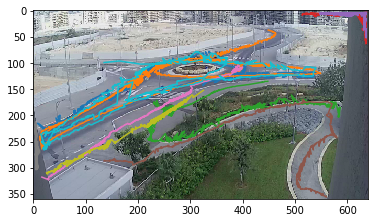

In [3]:

objs = df.groupby(["filename", "obj"]).size().sort_values(ascending=False)
top10 = objs.head(10)
draw_path(top10)

In [4]:
def filter_by_date_time(date,begin,end):
    objs = df.groupby(["filename", "obj"]).agg({'time':['min','max']})

    date =pd.to_datetime(date)
    begin_time =date+ pd.to_timedelta(begin)
    end_time =date+pd.to_timedelta(end)

    # print(date,begin_time,end_time)
#     print(objs) 
    min=objs[('time','min')]
    max=objs[('time','max')]
#     print(min.dt.date)
    items=objs[(min.between(begin_time,end_time)) | ((min.where(min<begin_time)&(max.where(max>begin_time))))]
    print(objs)
    draw_path(items)


                                                            time  \
                                                             min   
filename                                 obj                       
-16\20170820143029_100.h264.txt          22  2017-08-20 14:31:09   
.h264.txt                                4   2017-08-20 16:51:53   
                                         13  2017-08-23 10:46:30   
0.h264.txt                               39  2017-08-24 08:52:55   
0003141_100.h264.txt                     6   2017-08-20 00:33:52   
                                         7   2017-08-20 00:33:52   
                                         8   2017-08-20 00:33:52   
                                         9   2017-08-20 00:33:52   
                                         10  2017-08-20 00:33:52   
0041952_100.h264.txt                     7   2017-08-20 04:24:11   
                                         8   2017-08-20 04:24:11   
                                         9   201

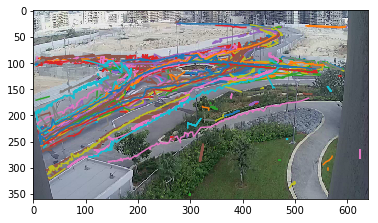

In [5]:
# filter_by_date_time("2017-08-20","04:00:02","09:03:02")

In [6]:
def filter_by_time(begin,end):
    objs = df.groupby(["filename", "obj"]).agg({'time':['min','max']})

    begin_time =pd.to_datetime(begin).time()
    end_time =pd.to_datetime(end).time()

    # print(date,begin_time,end_time)
#     print(objs) 
    min=objs.time['min'].dt.time#objs[('time','min')]
    max=objs.time['max'].dt.time#objs[('time','max')]
    print(min,max)
    items=objs[(min.between(begin_time,end_time)) | ((min<begin_time)&(max>begin_time))]
    print(items)
    draw_path(items)

In [7]:
# filter_by_time("04:00:02","09:03:02")

In [8]:
# import pylab as plt

# # Load the image
# img = imread("paths0.png")

# # Grid lines at these intervals (in pixels)
# # dx and dy can be different
# h,w=img.shape[:2]
# print(h,w)
# dy, dx = w//10,h//10

# # Custom (rgb) grid color
# grid_color = [0,0,0]

# # Modify the image to include the grid
# # img[:,::dy,:] = grid_color
# img[::dx,:,:] = grid_color

# # Show the result
# plt.imshow(img)
# plt.show()


In [38]:
areas=[53,54]
a_set=set(areas)
da=pd.DataFrame(columns=["frame", "x", "y", "obj", "size", "seq", "filename", "time", "areas"])
list=[]
for x in a_set:
    df[df.areas==x]

# da.append(list) 
# objs[objs['areas'].isin(a_set)]
# data_as = self.last[self.last.areas.isin(a_set)]
da

,frame,x,y,obj,size,seq,filename,time,areas
